In [319]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [320]:
df=pd.read_csv("media\heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [321]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [322]:
df.shape

(918, 12)

In [323]:
df.duplicated().sum()

0

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [325]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [326]:
# No tenemos datos nulos, no debemos eliminar ninguno

In [327]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [328]:
# Tenemos una población de personas entre 28 y 77 años
# Hay valores 0 en RestingBP , Cholesterol y negativo en Oldpeak

In [329]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [330]:
columns = list(df.columns)
columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

**Age** : La edad del paciente [years]

**Sex**: El sexo del paciente  [M: Male, F: Female]

**ChestPainType**: Tipo de dolor de pecho [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP**: presión arterial en reposo:
   - Tension Baja - 90/60mmHg tenemos la tensión baja [mm Hg]
   - Hipertenso - por encima de los 140/90 mmHg somos hipertensos
   - Tension Normal - 120 mmHg para la sistólica y 80 mmHg
   - Tension normal alta - Entre 120/80 mmHg y los 139/89mmHg,

**Cholesterol**: Colesterol serico. Es el colesterol total e incluye ambos tipos: El colesterol de lipoproteína de baja densidad (LDL, por su sigla en inglés) y el colesterol de lipoproteína de alta densidad (HDL, por su sigla en inglés) o Colesterol malo (LDL) Se mide en [mm/dl]

Para personas de 20 años o mayores un nivel saludable es 125 a 200 mg/dL


**FastingBS**: Nivel de azucar en ayunas (fasting blood sugar) [1: if FastingBS > 120 mg/dl, 0: otherwise]
   - Los valores de azúcar en la sangre en ayunas de 99 mg/dl o menores son normales, 
   - los de 100 a 125 mg/dl indican que tiene prediabetes 
   - los de 126 mg/dl o mayores indican que tiene diabetes.

**RestingECG**: Resultados electrocardiográficos en reposo (resting electrocardiogram results):
   - Normal: Normal
   - ST:  Tener anormalidad de onda ST-T (inversiones de onda T y / o elevación o Depresión de ST de > 005 mV))
          (having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) )
   - LVH: Muestra hipertropía ventricular izquierda probable o definitiva según los criterios de Estes.
          (showing probable or definite left ventricular hypertrophy by Estes' criteria)

**MaxHR**: frecuencia cardíaca máxima alcanzada (maximum heart rate achieved) [Numeric value between 60 and 202]
   - Una frecuencia cardíaca en reposo normal para los adultos oscila entre 60 y 100 latidos por minuto. La maxima frecuencia se puede obtener FC max = 206 – 0.88 x edad. 

**ExerciseAngina**: Angina inducida por ejercicio (exercise-induced angina) [Y: Yes, N: No]

**Oldpeak**: Depresión del ST inducida por el ejercicio en relación con el descanso (oldpeak) = ST [Numeric value measured in depression]

**ST_Slope**: La pendiente del segmento ST de ejercicio pico (categórica con 3 niveles) - (the slope of the peak exercise ST segment)
   - Up: upsloping - ascenso
   - Flat: flat - plano
   - Down: downsloping - descenso

**HeartDisease**: Enfermedad del corazón (output class) [1: heart disease, 0: Normal]

In [331]:
df['Age'].sort_values().unique()

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
      dtype=int64)

In [332]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [333]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [334]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [335]:
df.groupby(['Sex'])['HeartDisease'].count()

Sex
F    193
M    725
Name: HeartDisease, dtype: int64

**Pasamos a visualizar graficamente la informacion**

Vamos a comprobar si hay alguna diferencia de los valores binarios para el resto de los campos, es decir 
   - Sex
   - FastingBS
   - ExerciseAngina
   
Luego haremos la misma comprobación con la información de las variables categóricas transformadas en numericas:
   - ChestPainType
   - RestingECG
   - ST_Slope

Las variables con valores multiples son:
   - Age
   - RestingBP
   - Cholesterol
   - MaxHR
   - Oldpeak
    

In [336]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [337]:
columns = list(df.columns)
columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [338]:
#Vemos donde se encuentras los valores de las variables multiples ( Age, RestingBP, Cholesterol, MaxHR, )

In [339]:
df[(df.Oldpeak<0)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
321   63   M           ASY        100            0          1     Normal   
324   46   M           ASY        100            0          1         ST   
325   42   M           ASY        105            0          1     Normal   
326   45   M           NAP        110            0          0     Normal   
331   56   M           ASY        115            0          1         ST   
332   38   M           NAP        100            0          0     Normal   
334   51   M           ASY        130            0          1     Normal   
335   62   M            TA        120            0          1        LVH   
352   56   M           ASY        120            0          0         ST   
407   62   M           ASY        115            0          1     Normal   
413   56   M           NAP        125            0          1     Normal   
421   66   M           NAP        120            0          0         ST   
512   35   M           NAP        123          161          0         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
321    109              N     -0.9     Flat             1  
324    133              N     -2.6     Flat             1  
325    128              Y     -1.5     Down             1  
326    138              N     -0.1       Up             0  
331     82              N     -1.0       Up             1  
332    179              N     -1.1       Up             0  
334    170              N     -0.7       Up             1  
335    134              N     -0.8     Flat             1  
352    100              Y     -1.0     Down             1  
407     72              Y     -0.5     Flat             1  
413     98              N     -2.0     Flat             1  
421    120              N     -0.5       Up             0  
512    153              N     -0.1       Up             0

In [340]:
# Hay valores 0 en RestingBP , Cholesterol y FastingBS y negativo en Oldpeak

In [341]:
df[(df.Cholesterol==0)].Cholesterol.value_counts()

0    172
Name: Cholesterol, dtype: int64

In [342]:
# Histogramas: Age, RestingBP, MaxHR y OldPeak
#

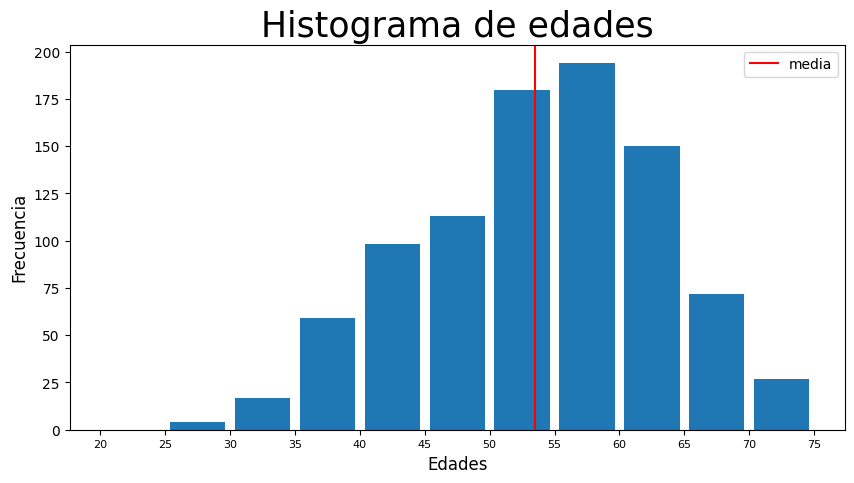

In [81]:
plt.figure(figsize=(10,5))
intervalos = list(range(20, 80, 5)) #calculamos los extremos de los intervalos
plt.hist(x=df.Age, bins=intervalos, rwidth=0.85, histtype="bar" )
plt.axvline(x = df.Age.mean(), color = 'red', label = 'media') 
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('Histograma de edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma de Edad

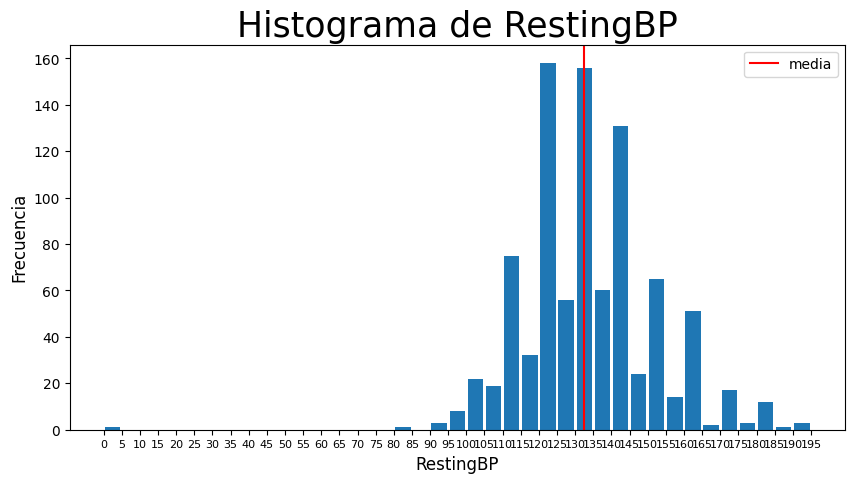

In [82]:
plt.figure(figsize=(10,5))
intervalos = list(range(0, 200, 5)) #calculamos los extremos de los intervalos
plt.hist(x=df.RestingBP, bins=intervalos, rwidth=0.85, histtype="bar" )
plt.axvline(x = df.RestingBP.mean(), color = 'red', label = 'media') 
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('Histograma de RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma RestingBP

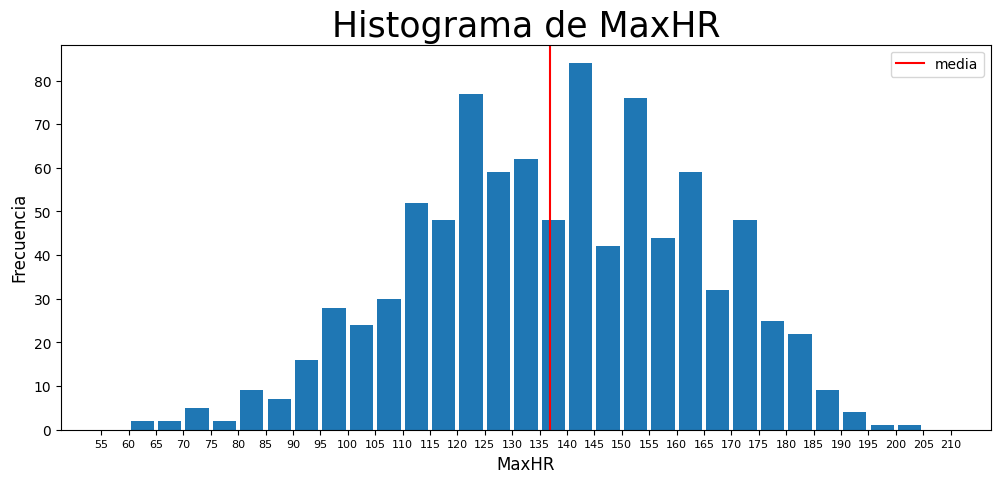

In [83]:
plt.figure(figsize=(12,5))
intervalos = list(range(55, 215, 5)) #calculamos los extremos de los intervalos
plt.hist(x=df.MaxHR, bins=intervalos, rwidth=0.85, histtype="bar" )
plt.axvline(x = df.MaxHR.mean(), color = 'red', label = 'media') 
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('Histograma de MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma MaxHR

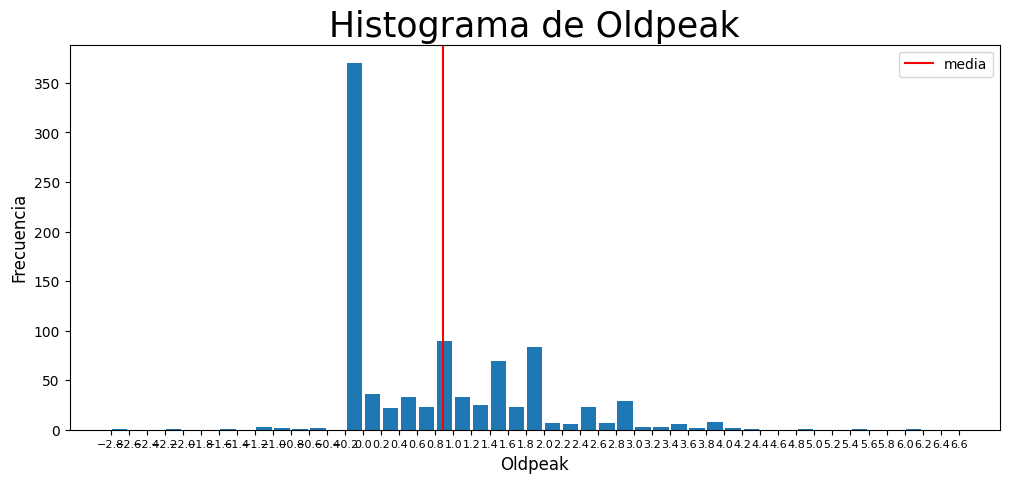

In [84]:
plt.figure(figsize=(12,5))

parameters = {'axes.labelsize': 12,
          'axes.titlesize': 25, "xtick.labelsize":8}
plt.rcParams.update(parameters)

intervalos = list(np.arange (-2.8, 6.8, 0.2)) #calculamos los extremos de los intervalos
plt.hist(x=df.Oldpeak, bins=intervalos, rwidth=0.85, histtype="bar" )
plt.axvline(x = df.Oldpeak.mean(), color = 'red', label = 'media') 
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('Histograma de Oldpeak')
plt.xlabel('Oldpeak')

plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma OldPeak

In [24]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [25]:
fig = px.histogram(df, x="Age", marginal="box")
fig.update_layout(title='Distribution of Age')
fig.show()

In [26]:
fig = px.histogram(df, x="Age", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [27]:
fig = px.histogram(df, x="Oldpeak", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [28]:
fig = px.pie(df, names='Sex')
fig.update_layout(title='% of Sex')
fig.show()

In [29]:
fig = px.histogram(df, x="Sex",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [30]:
fig = px.pie(df, names='HeartDisease')
fig.update_layout(title='% of Heart Disease')
fig.show()

In [31]:
fig = px.pie(df, names='FastingBS')
fig.update_layout(title='% of FastingBS')
fig.show()

In [32]:
fig = px.histogram(df, x="FastingBS",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [33]:
fig = px.pie(df, names='ExerciseAngina')
fig.update_layout(title='% of ExerciseAngina')
fig.show()

In [34]:
fig = px.histogram(df, x="ExerciseAngina",
                   color='HeartDisease', 
                   barmode='group', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [35]:
fig = px.pie(df, names='ChestPainType', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of ChestPain Type')
fig.show()

In [36]:
fig = px.histogram(df, x="ChestPainType",
                   color='HeartDisease', 
                   barmode='group', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [37]:
fig = px.pie(df, names='RestingECG', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of RestingECG')
fig.show()

In [38]:
fig = px.histogram(df, x="RestingECG",
                   color='HeartDisease', 
                   barmode='group', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [39]:
fig = px.pie(df, names='ST_Slope', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of ST_Slope')
fig.show()

In [40]:
fig = px.histogram(df, x="ST_Slope",
                   color='HeartDisease', 
                   barmode='group', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [41]:
#Vemos como se comportan las variables de valores multiples ( Age, RestingBP, Cholesterol, MaxHR, ) con los valores
# binarios: HeartDisease,  Sex, FastingBS, ExerciseAngina

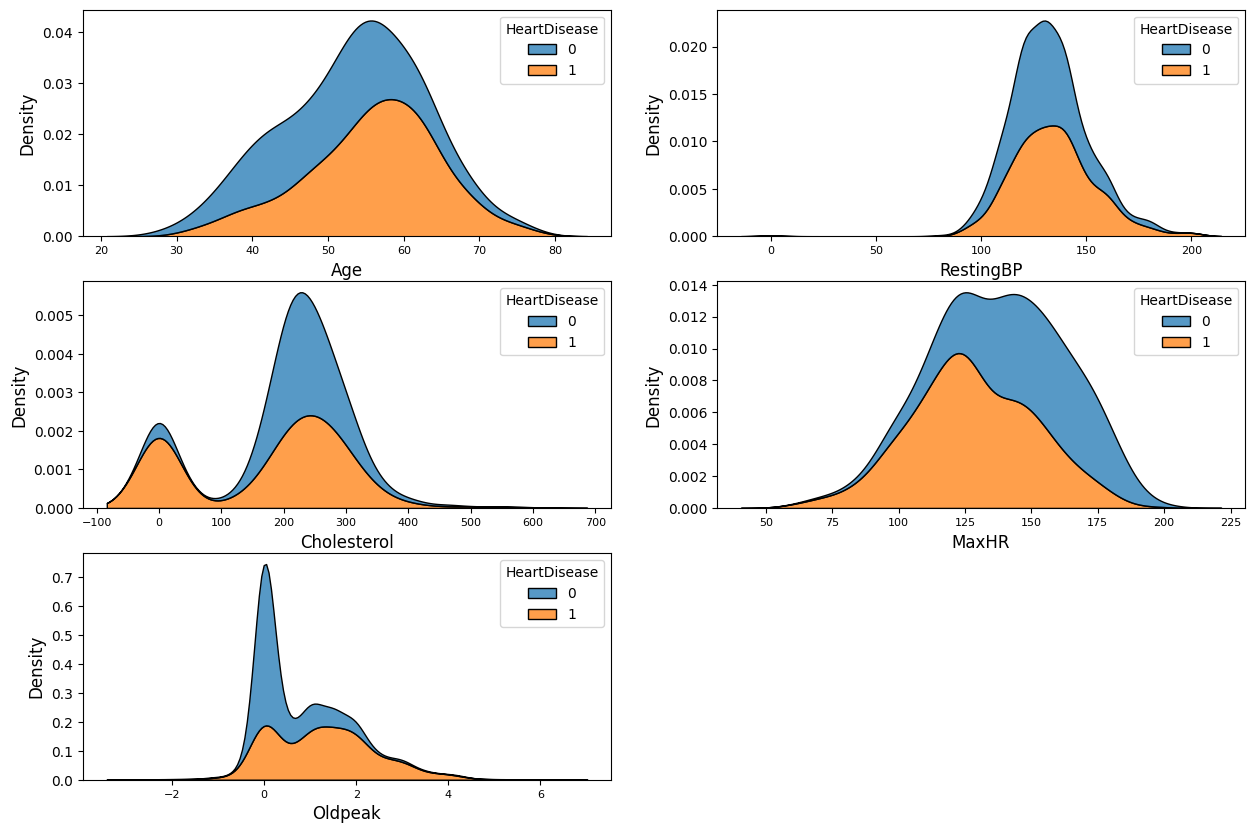

In [103]:
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.kdeplot(data=df, x="Age", hue="HeartDisease", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=df, x="RestingBP", hue="HeartDisease", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=df, x="Cholesterol", hue="HeartDisease", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=df, x="MaxHR", hue="HeartDisease", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=df, x="Oldpeak", hue="HeartDisease", multiple="stack")

plt.show()

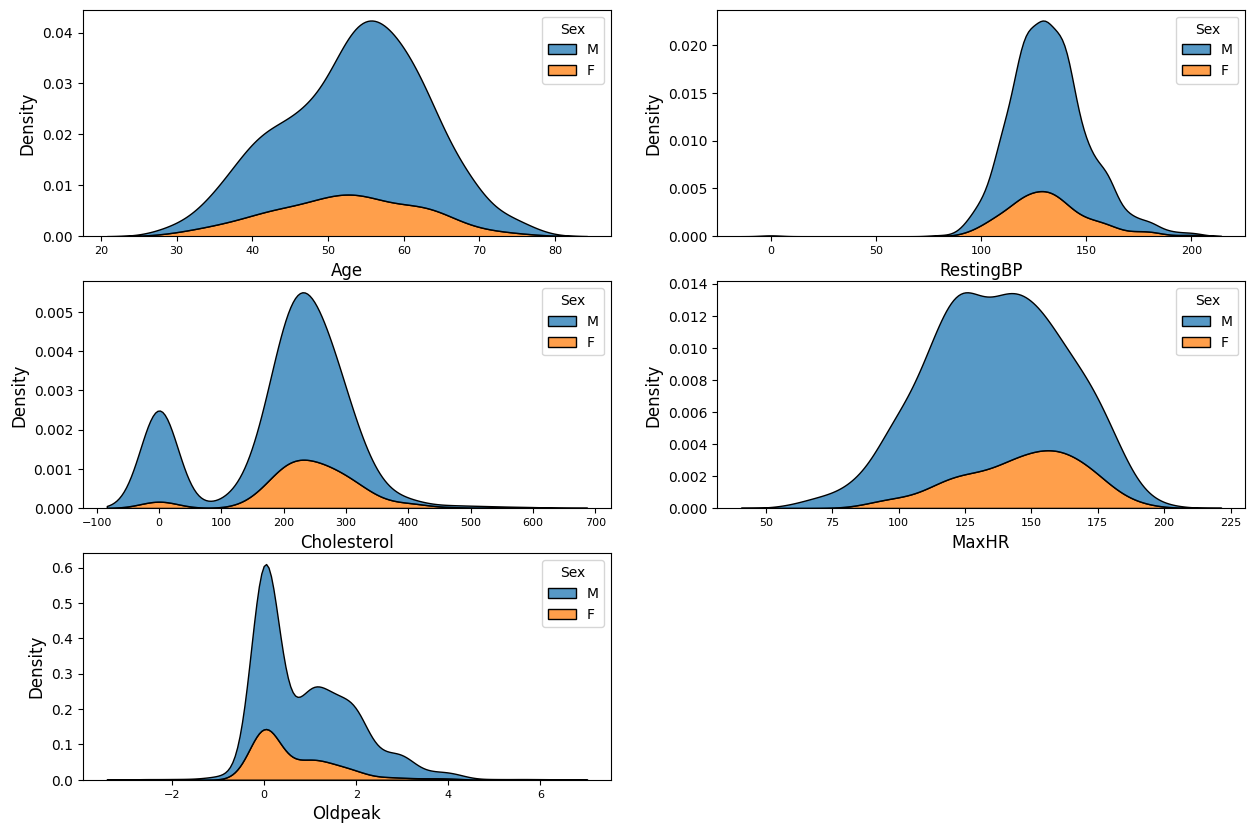

In [104]:
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.kdeplot(data=df, x="Age", hue="Sex", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=df, x="RestingBP", hue="Sex", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=df, x="Cholesterol", hue="Sex", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=df, x="MaxHR", hue="Sex", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=df, x="Oldpeak", hue="Sex", multiple="stack")

plt.show()

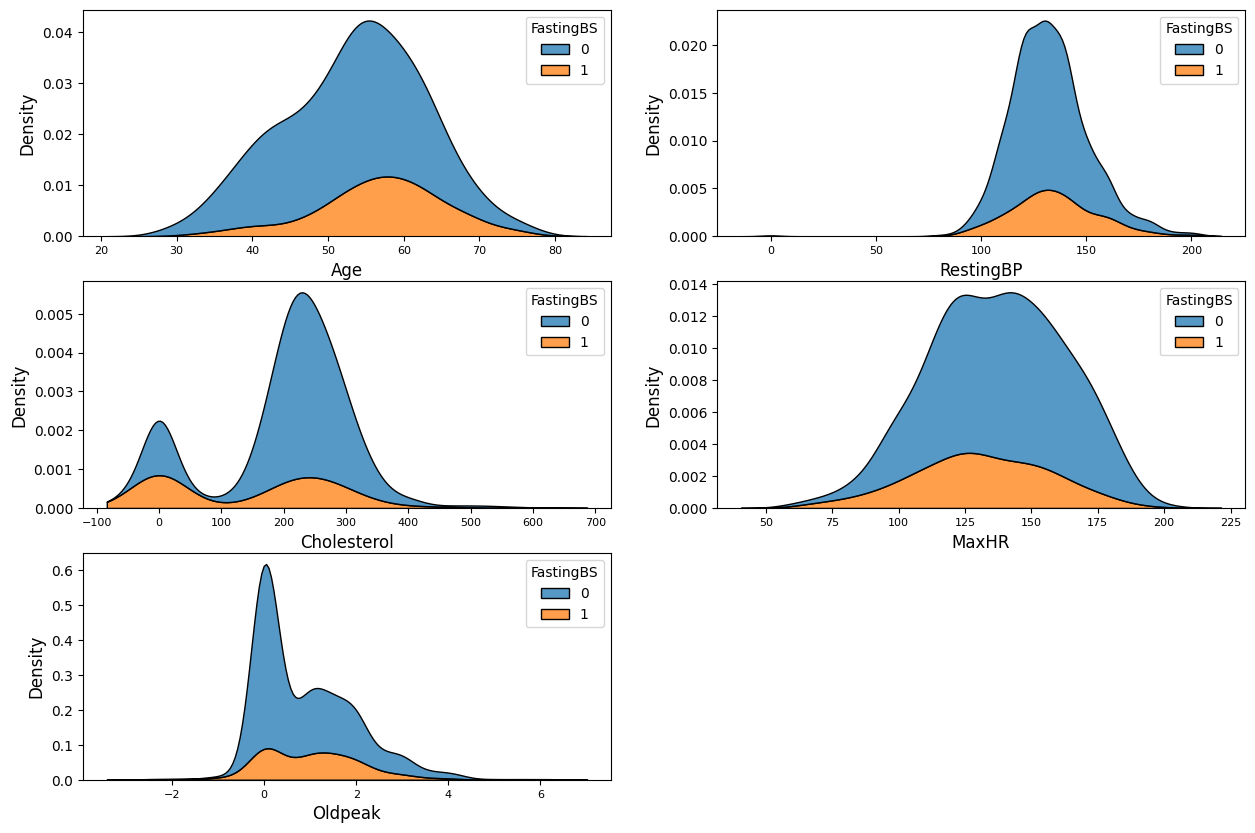

In [106]:
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.kdeplot(data=df, x="Age", hue="FastingBS", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=df, x="RestingBP", hue="FastingBS", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=df, x="Cholesterol", hue="FastingBS", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=df, x="MaxHR", hue="FastingBS", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=df, x="Oldpeak", hue="FastingBS", multiple="stack")
plt.show()

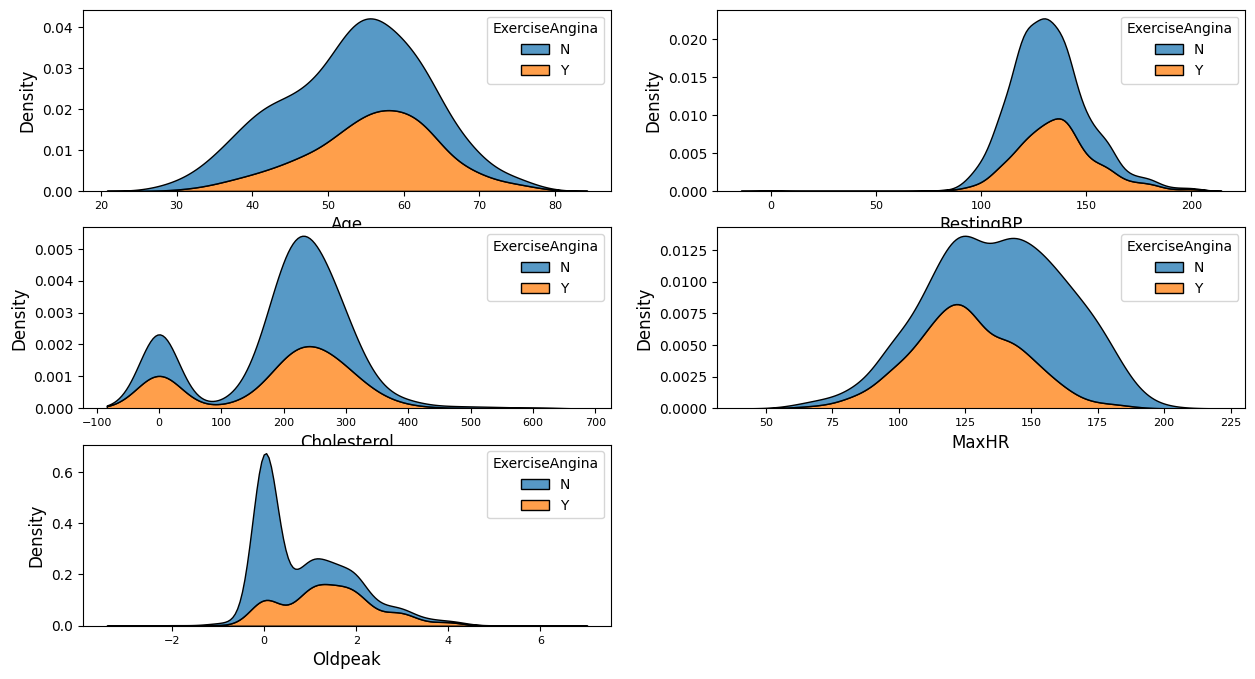

In [109]:
plt.figure(figsize=(15,8))

plt.subplot(321)
sns.kdeplot(data=df, x="Age", hue="ExerciseAngina", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=df, x="RestingBP", hue="ExerciseAngina", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=df, x="Cholesterol", hue="ExerciseAngina", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=df, x="MaxHR", hue="ExerciseAngina", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=df, x="Oldpeak", hue="ExerciseAngina", multiple="stack")
plt.show()

In [110]:
#Vemos como se comportan las variables de valores multiples ( Age, RestingBP, Cholesterol, MaxHR, Oldpeak) con los valores
# de las variables categoricas ChestPainType, RestingECG, ST_Slope

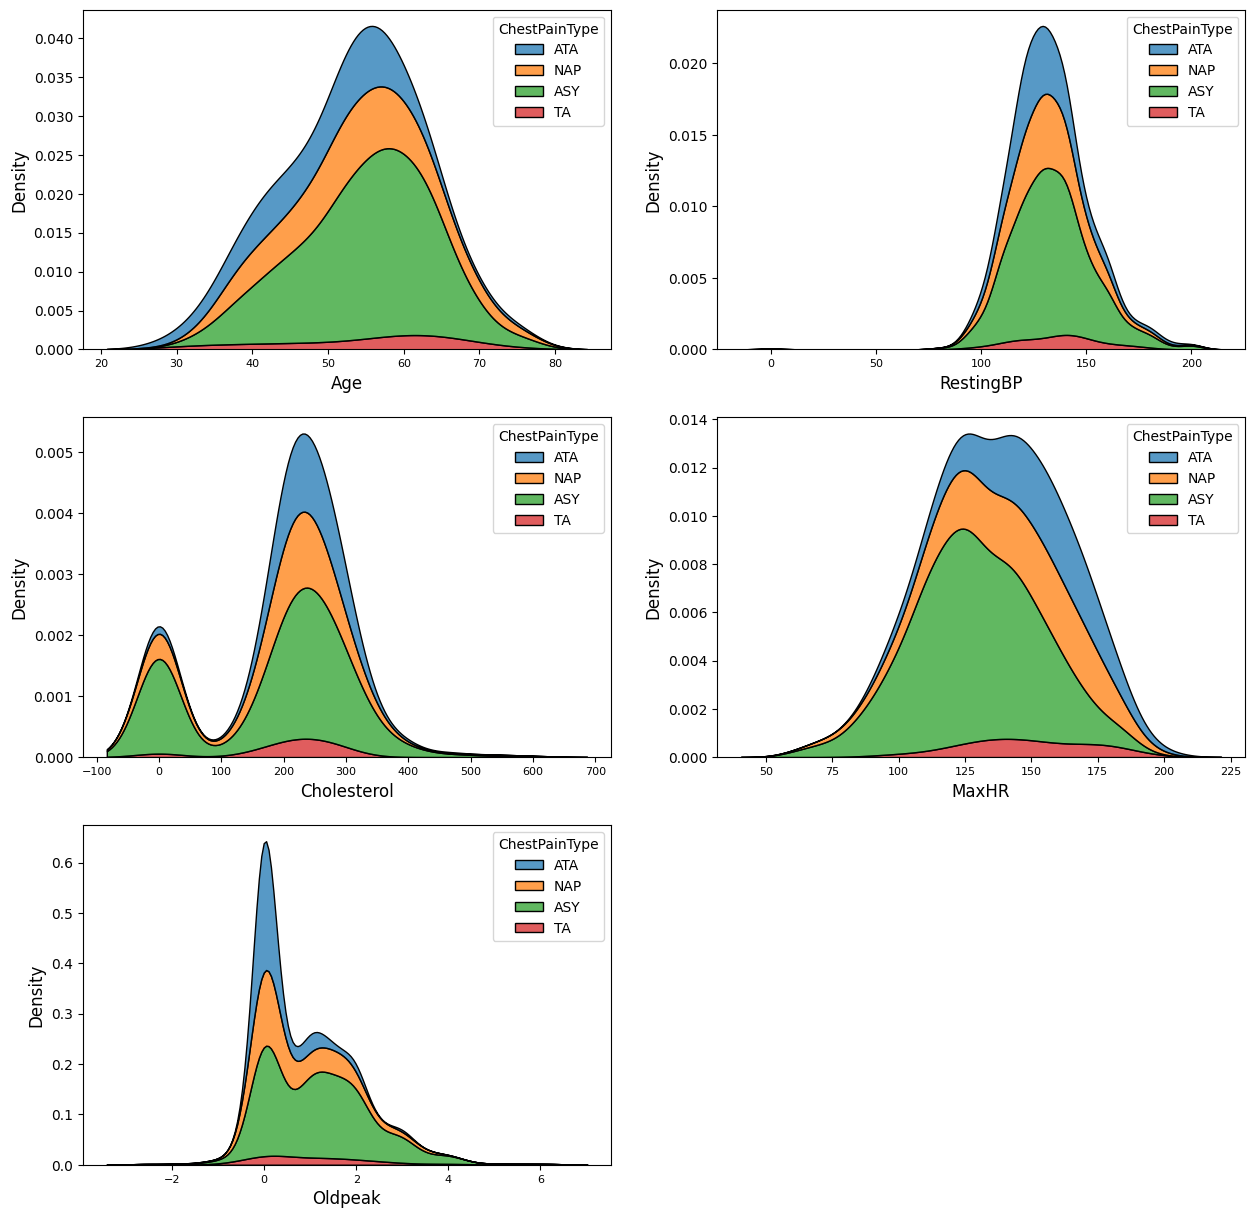

In [111]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sns.kdeplot(data=df, x="Age", hue="ChestPainType", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=df, x="RestingBP", hue="ChestPainType", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=df, x="Cholesterol", hue="ChestPainType", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=df, x="MaxHR", hue="ChestPainType", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=df, x="Oldpeak", hue="ChestPainType", multiple="stack")

plt.show()

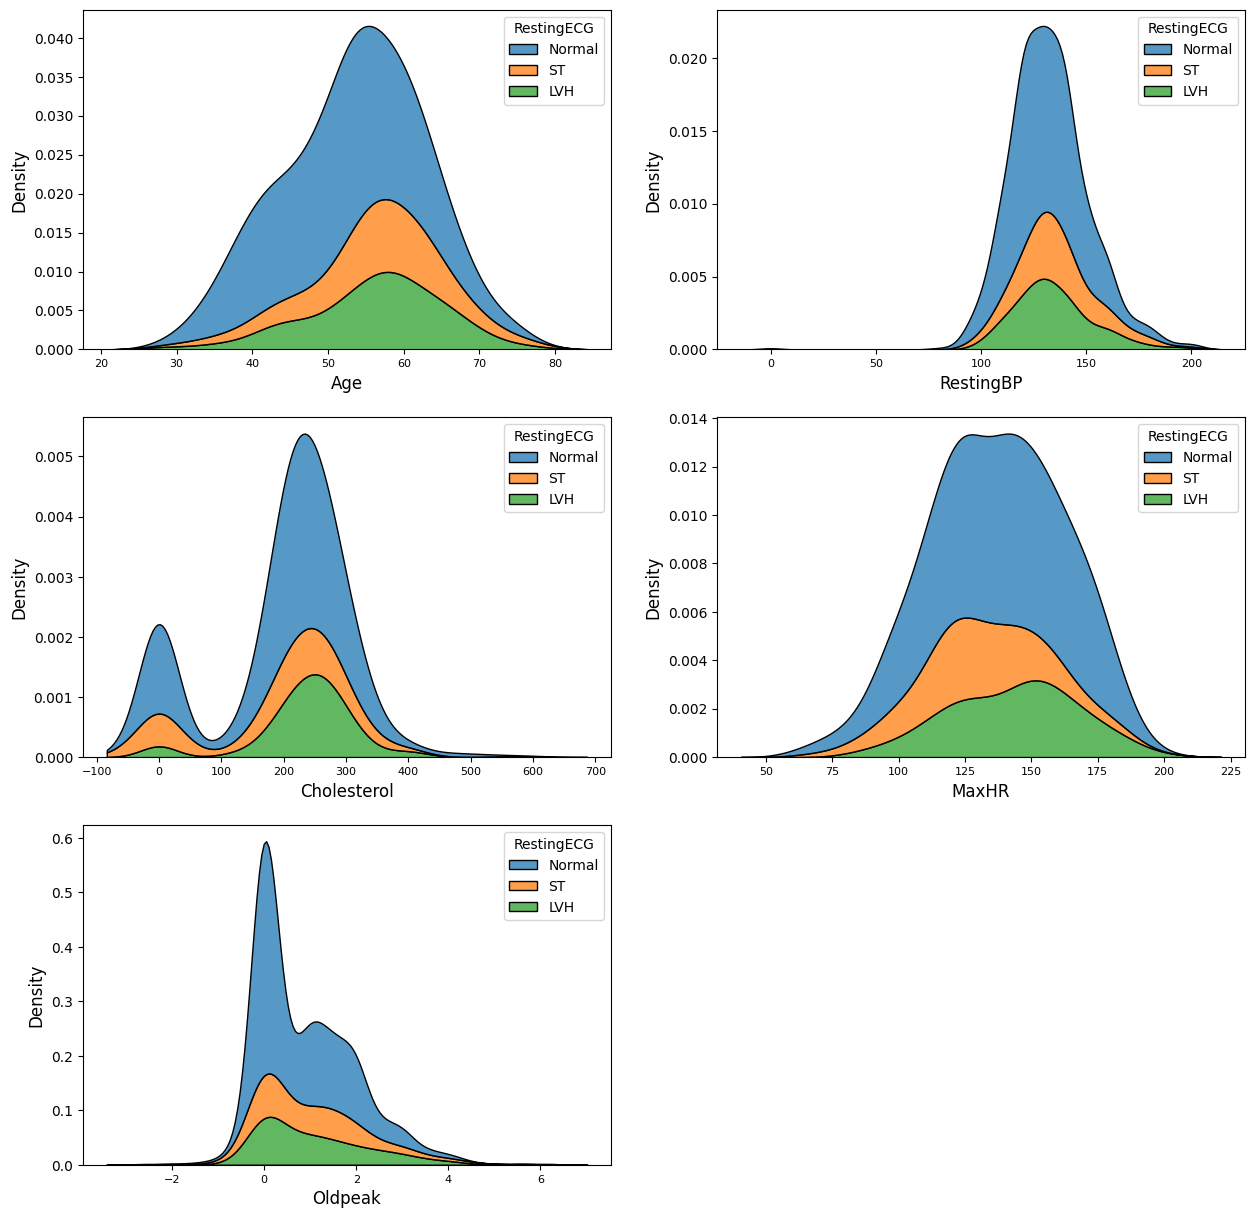

In [113]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sns.kdeplot(data=df, x="Age", hue="RestingECG", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=df, x="RestingBP", hue="RestingECG", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=df, x="Cholesterol", hue="RestingECG", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=df, x="MaxHR", hue="RestingECG", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=df, x="Oldpeak", hue="RestingECG", multiple="stack")

plt.show()

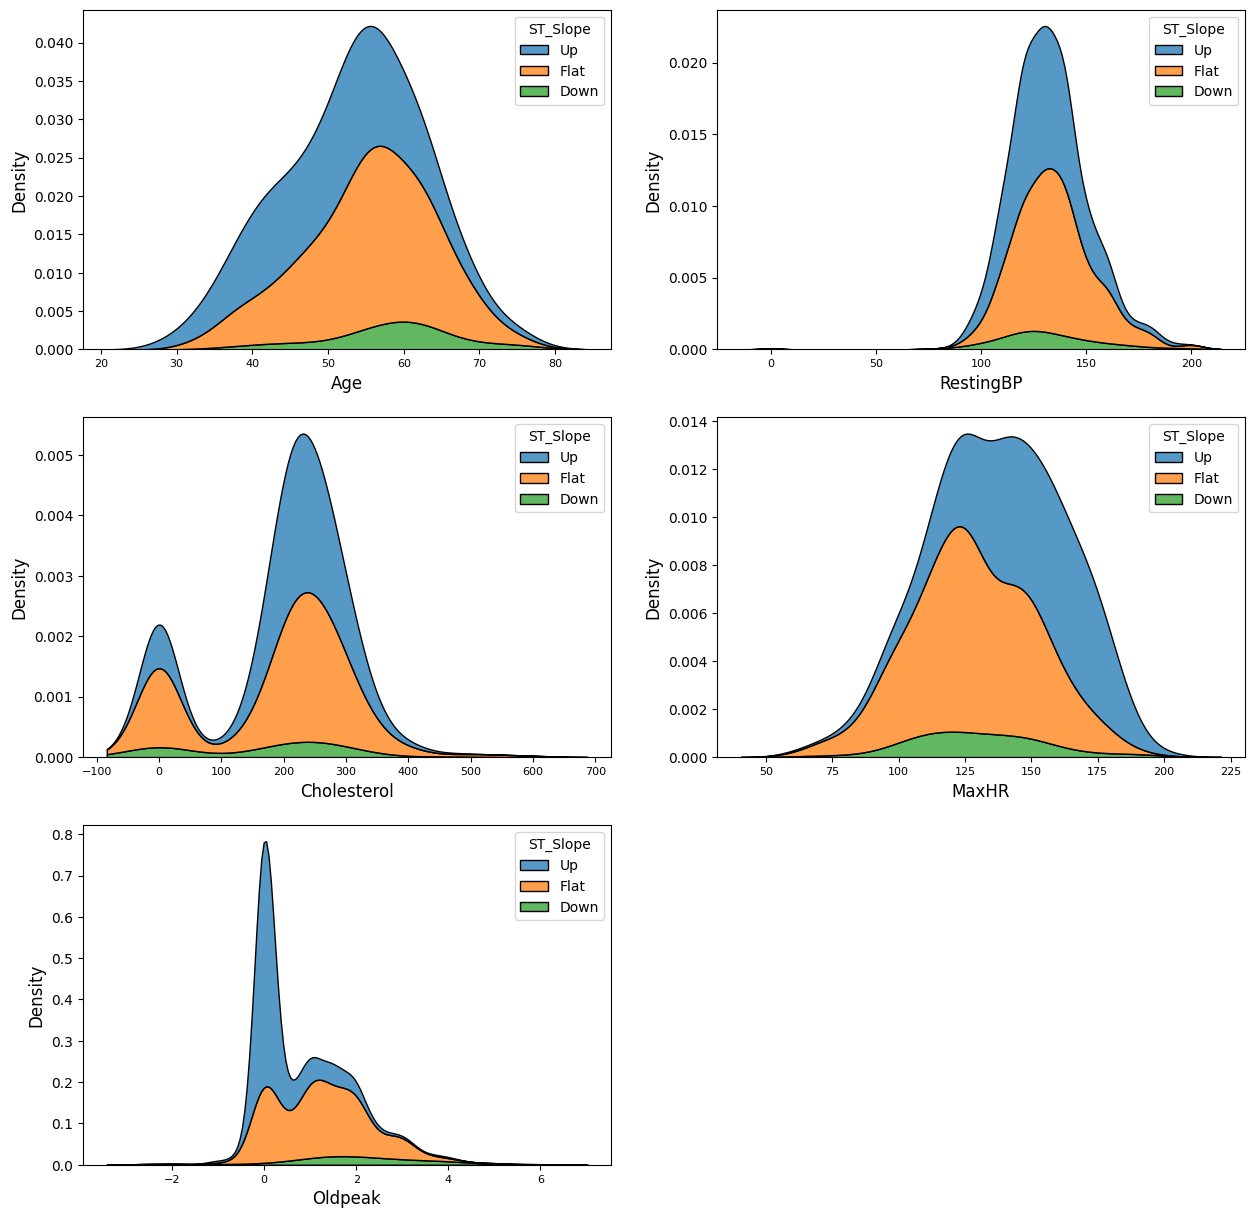

In [114]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sns.kdeplot(data=df, x="Age", hue="ST_Slope", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=df, x="RestingBP", hue="ST_Slope", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=df, x="Cholesterol", hue="ST_Slope", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=df, x="MaxHR", hue="ST_Slope", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=df, x="Oldpeak", hue="ST_Slope", multiple="stack")

plt.show()

In [343]:
#Vemos como se comportan las variables categoricas ChestPainType, RestingECG, ST_Slope frente a las binarias
# HeartDisease,  Sex, FastingBS, ExerciseAngina

In [344]:
# Transformemos los datos catergoricos de ChestPainType, RestingECG, ST_Slope

In [345]:
data = df.copy()

In [346]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [347]:
encoder = LabelEncoder()

In [348]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [349]:
data["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [350]:
data["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [351]:
data["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [352]:
data[['ChestPainType', 'RestingECG', 'ST_Slope']] = data[['ChestPainType', 'RestingECG', 'ST_Slope']].apply(encoder.fit_transform)
data

Age Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40   M              1        140          289          0           1   
1     49   F              2        160          180          0           1   
2     37   M              1        130          283          0           2   
3     48   F              0        138          214          0           1   
4     54   M              2        150          195          0           1   
..   ...  ..            ...        ...          ...        ...         ...   
913   45   M              3        110          264          0           1   
914   68   M              0        144          193          1           1   
915   57   M              0        130          131          0           1   
916   57   F              1        130          236          0           0   
917   38   M              2        138          175          0           1   

     MaxHR ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172              N      0.0         2             0  
1      156              N      1.0         1             1  
2       98              N      0.0         2             0  
3      108              Y      1.5         1             1  
4      122              N      0.0         2             0  
..     ...            ...      ...       ...           ...  
913    132              N      1.2         1             1  
914    141              N      3.4         1             1  
915    115              Y      1.2         1             1  
916    174              N      0.0         1             1  
917    173              N      0.0         2             0  

[918 rows x 12 columns]

In [353]:
data["RestingECG"].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

         -Valor 1 es Normal    552
         -Valor 0 es LVH       188
         -Valor 2 es ST        178

In [354]:
data["ChestPainType"].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

     -Valor 0 es ASY    496
     -Valor 1 es NAP    203
     -Valor 2 es ATA    173
     -Valor 3 es TA     46

In [355]:
data["ST_Slope"].value_counts()

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

     - Valor 1 es Flat    460
     - Valor 2 es Up      395
     - Valor 0 es Down     63


In [356]:
data = pd.get_dummies(data, columns = ['Sex', 'ExerciseAngina'], drop_first=False)
data

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40              1        140          289          0           1    172   
1     49              2        160          180          0           1    156   
2     37              1        130          283          0           2     98   
3     48              0        138          214          0           1    108   
4     54              2        150          195          0           1    122   
..   ...            ...        ...          ...        ...         ...    ...   
913   45              3        110          264          0           1    132   
914   68              0        144          193          1           1    141   
915   57              0        130          131          0           1    115   
916   57              1        130          236          0           0    174   
917   38              2        138          175          0           1    173   

     Oldpeak  ST_Slope  HeartDisease  Sex_F  Sex_M  ExerciseAngina_N  \
0        0.0         2             0      0      1                 1   
1        1.0         1             1      1      0                 1   
2        0.0         2             0      0      1                 1   
3        1.5         1             1      1      0                 0   
4        0.0         2             0      0      1                 1   
..       ...       ...           ...    ...    ...               ...   
913      1.2         1             1      0      1                 1   
914      3.4         1             1      0      1                 1   
915      1.2         1             1      0      1                 0   
916      0.0         1             1      1      0                 1   
917      0.0         2             0      0      1                 1   

     ExerciseAngina_Y  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
..                ...  
913                 0  
914                 0  
915                 1  
916                 0  
917                 0  

[918 rows x 14 columns]

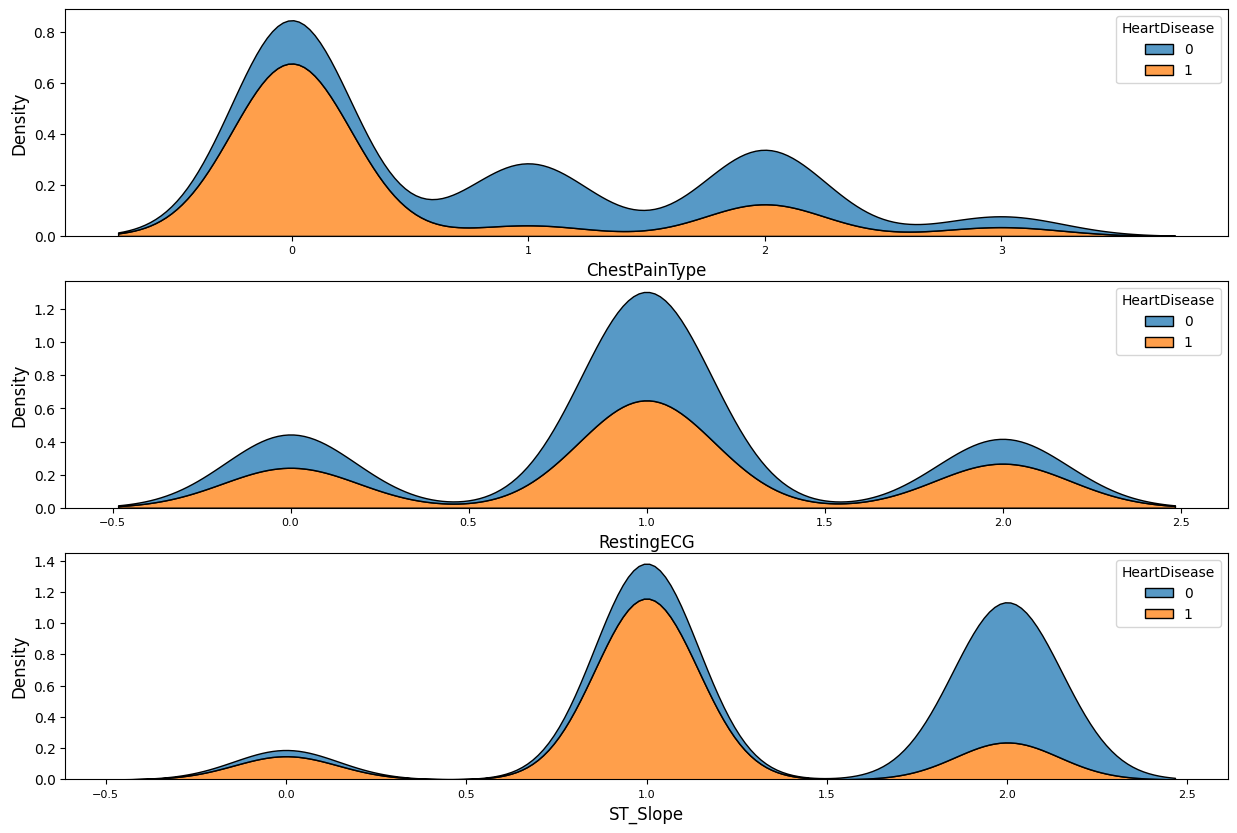

In [129]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.kdeplot(data=data, x="ChestPainType", hue="HeartDisease", multiple="stack")
plt.subplot(312)
sns.kdeplot(data=data, x="RestingECG", hue="HeartDisease", multiple="stack")
plt.subplot(313)
sns.kdeplot(data=data, x="ST_Slope", hue="HeartDisease", multiple="stack")

plt.show()

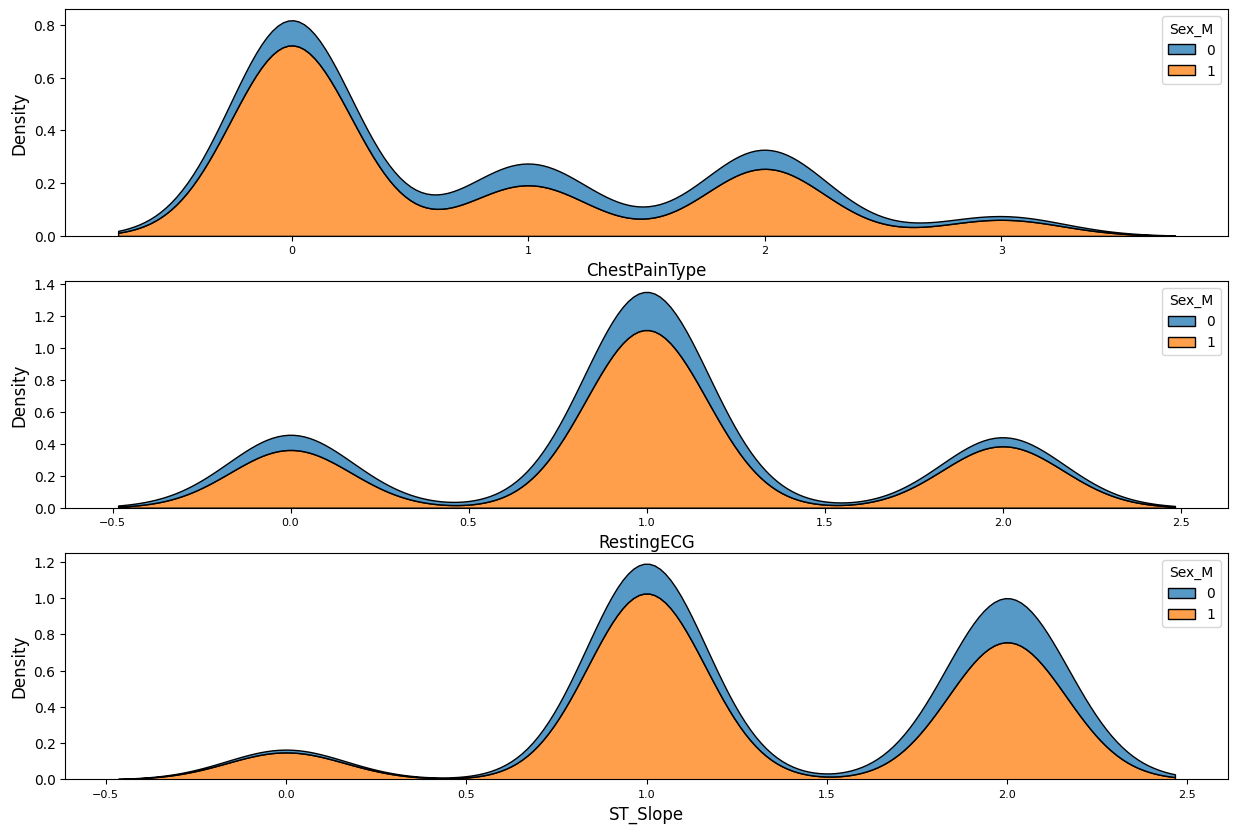

In [130]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.kdeplot(data=data, x="ChestPainType", hue="Sex_M", multiple="stack")
plt.subplot(312)
sns.kdeplot(data=data, x="RestingECG", hue="Sex_M", multiple="stack")
plt.subplot(313)
sns.kdeplot(data=data, x="ST_Slope", hue="Sex_M", multiple="stack")

plt.show()

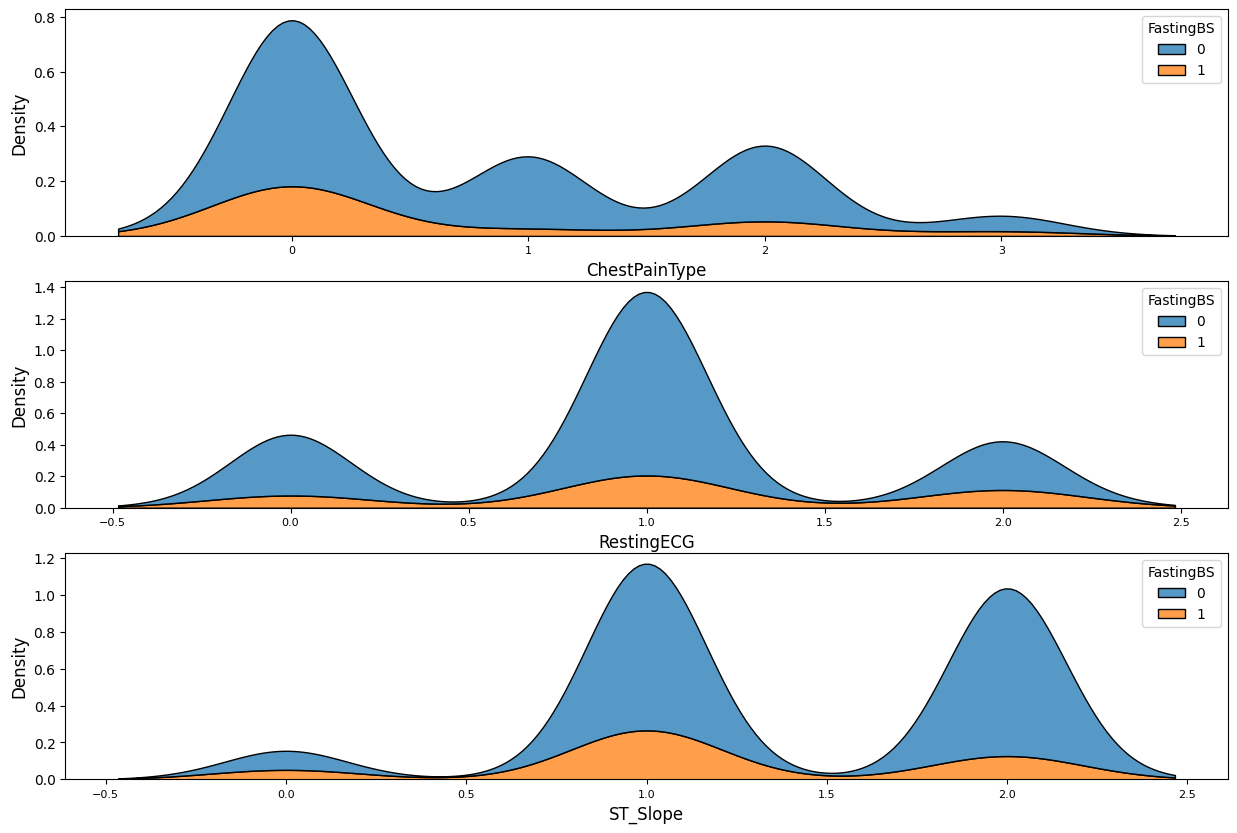

In [131]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.kdeplot(data=data, x="ChestPainType", hue="FastingBS", multiple="stack")
plt.subplot(312)
sns.kdeplot(data=data, x="RestingECG", hue="FastingBS", multiple="stack")
plt.subplot(313)
sns.kdeplot(data=data, x="ST_Slope", hue="FastingBS", multiple="stack")

plt.show()

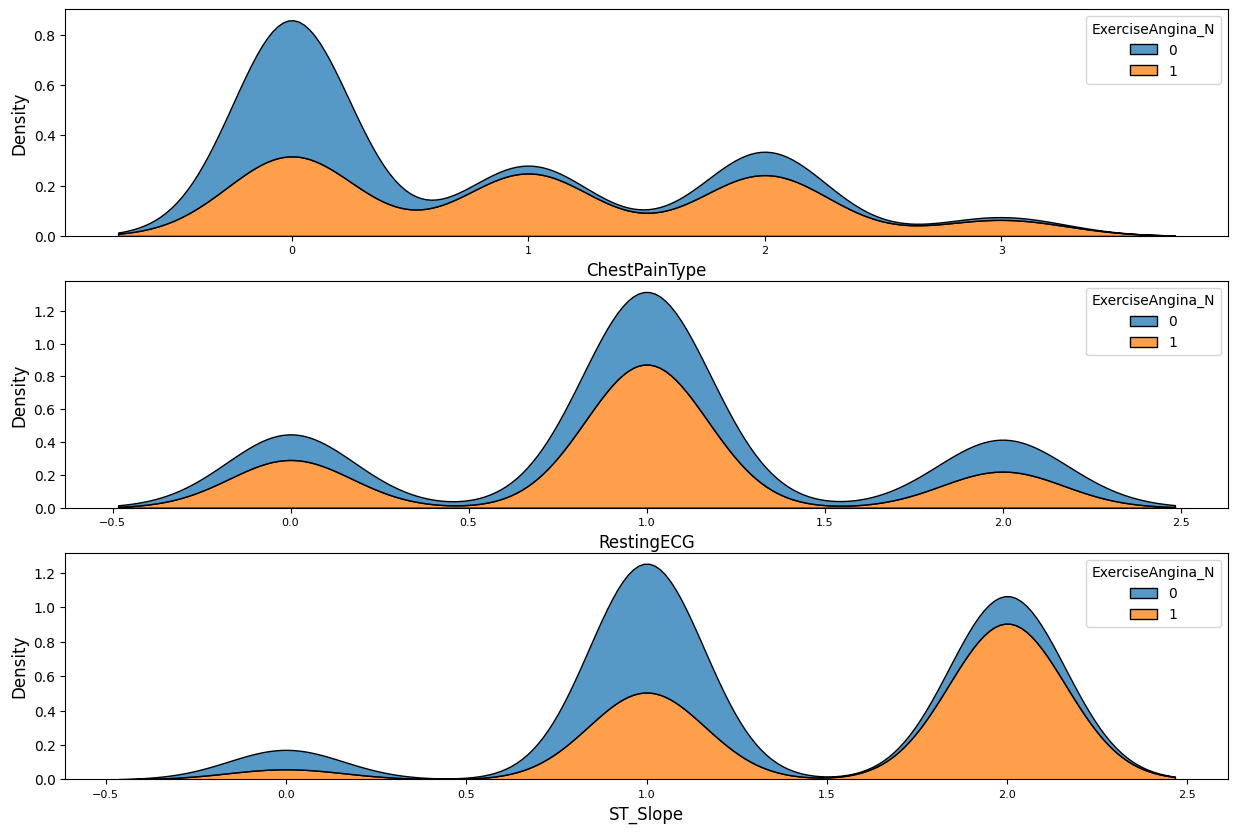

In [132]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.kdeplot(data=data, x="ChestPainType", hue="ExerciseAngina_N", multiple="stack")
plt.subplot(312)
sns.kdeplot(data=data, x="RestingECG", hue="ExerciseAngina_N", multiple="stack")
plt.subplot(313)
sns.kdeplot(data=data, x="ST_Slope", hue="ExerciseAngina_N", multiple="stack")

plt.show()

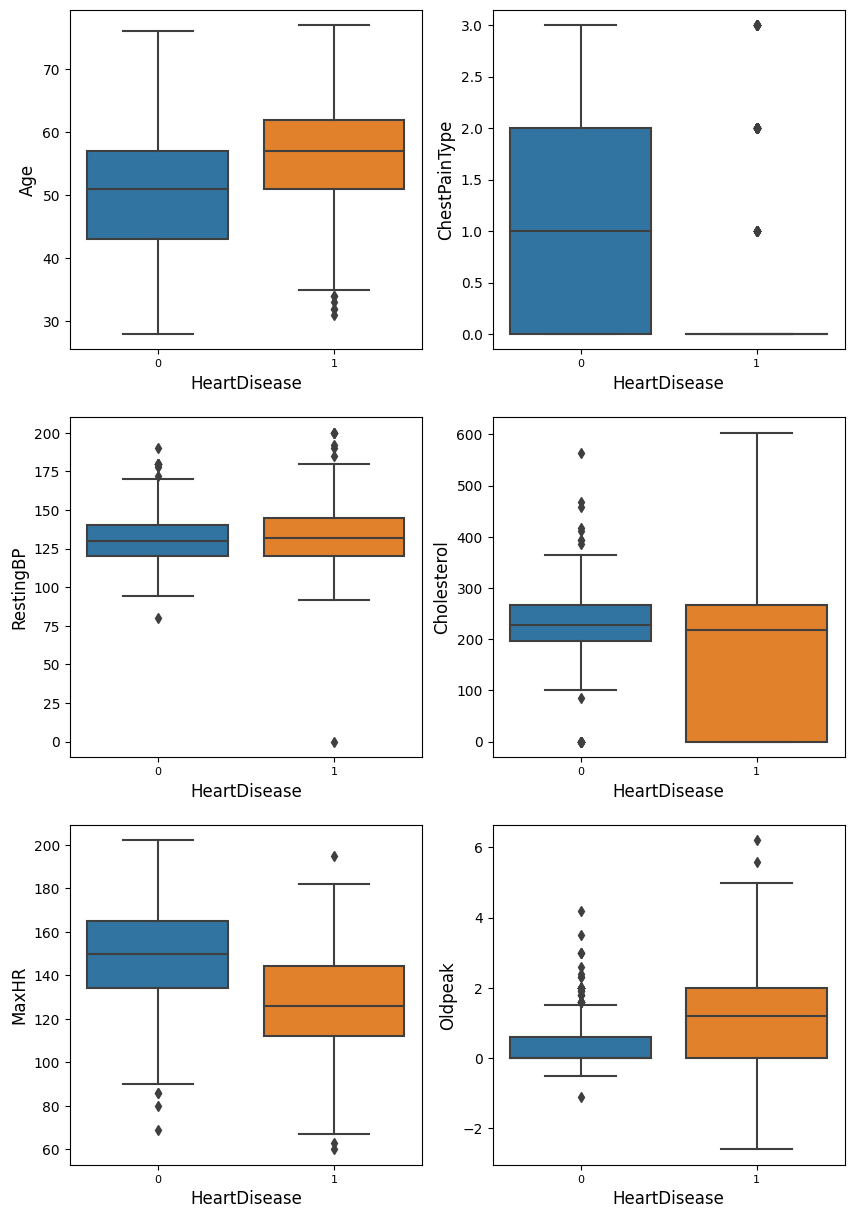

In [134]:
def graph(y):
    sns.boxplot(x="HeartDisease", y=y, data=data)

plt.figure(figsize=(10,15))
# Adding the subplot at the specified
# grid position
plt.subplot(321)
graph('Age')
plt.subplot(322)
graph('ChestPainType')
plt.subplot(323)
graph('RestingBP')
plt.subplot(324)
graph('Cholesterol')
plt.subplot(325)
graph('MaxHR')
plt.subplot(326)
graph('Oldpeak')
plt.show()

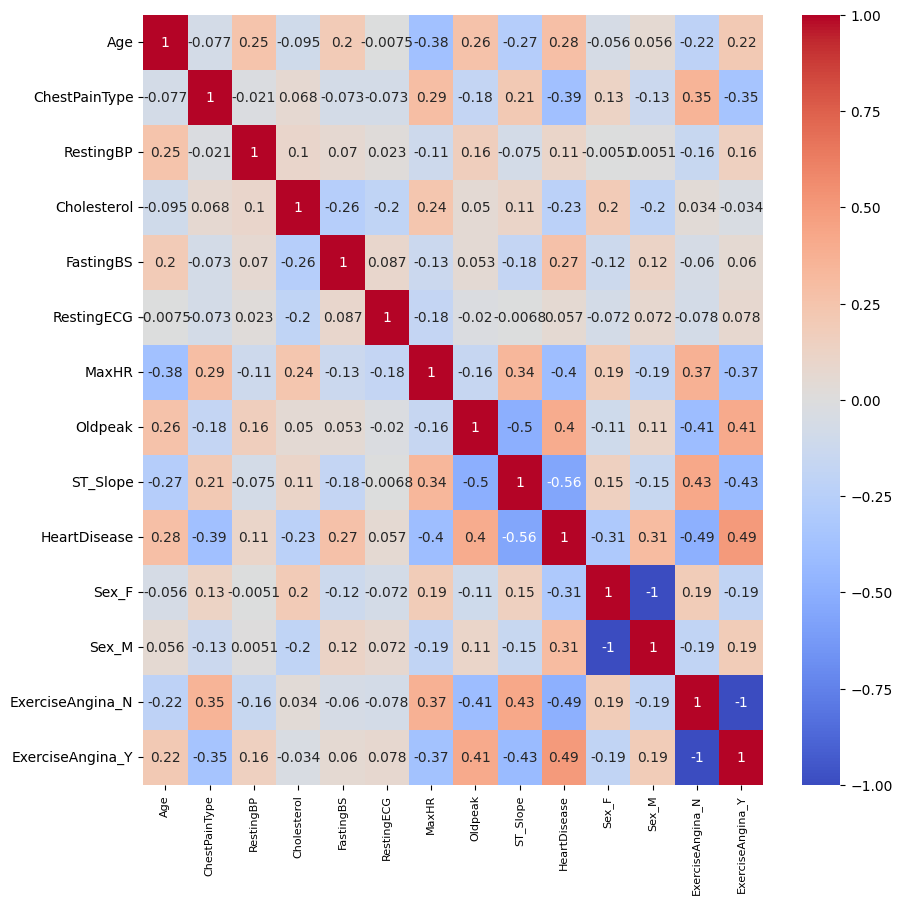

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'),annot = True, cmap = "coolwarm")
plt.show()

In [56]:
# Gráfico relacion Colesterol y Columnas con dependencia
# ==============================================================================

col_dependencia_colesterol = ['Age', 'Sex_M', 'MaxHR','ST_Slope']
for columna in col_dependencia_colesterol:
    fig = px.scatter(data, x="Cholesterol", y=columna, color="HeartDisease")
    fig.show()


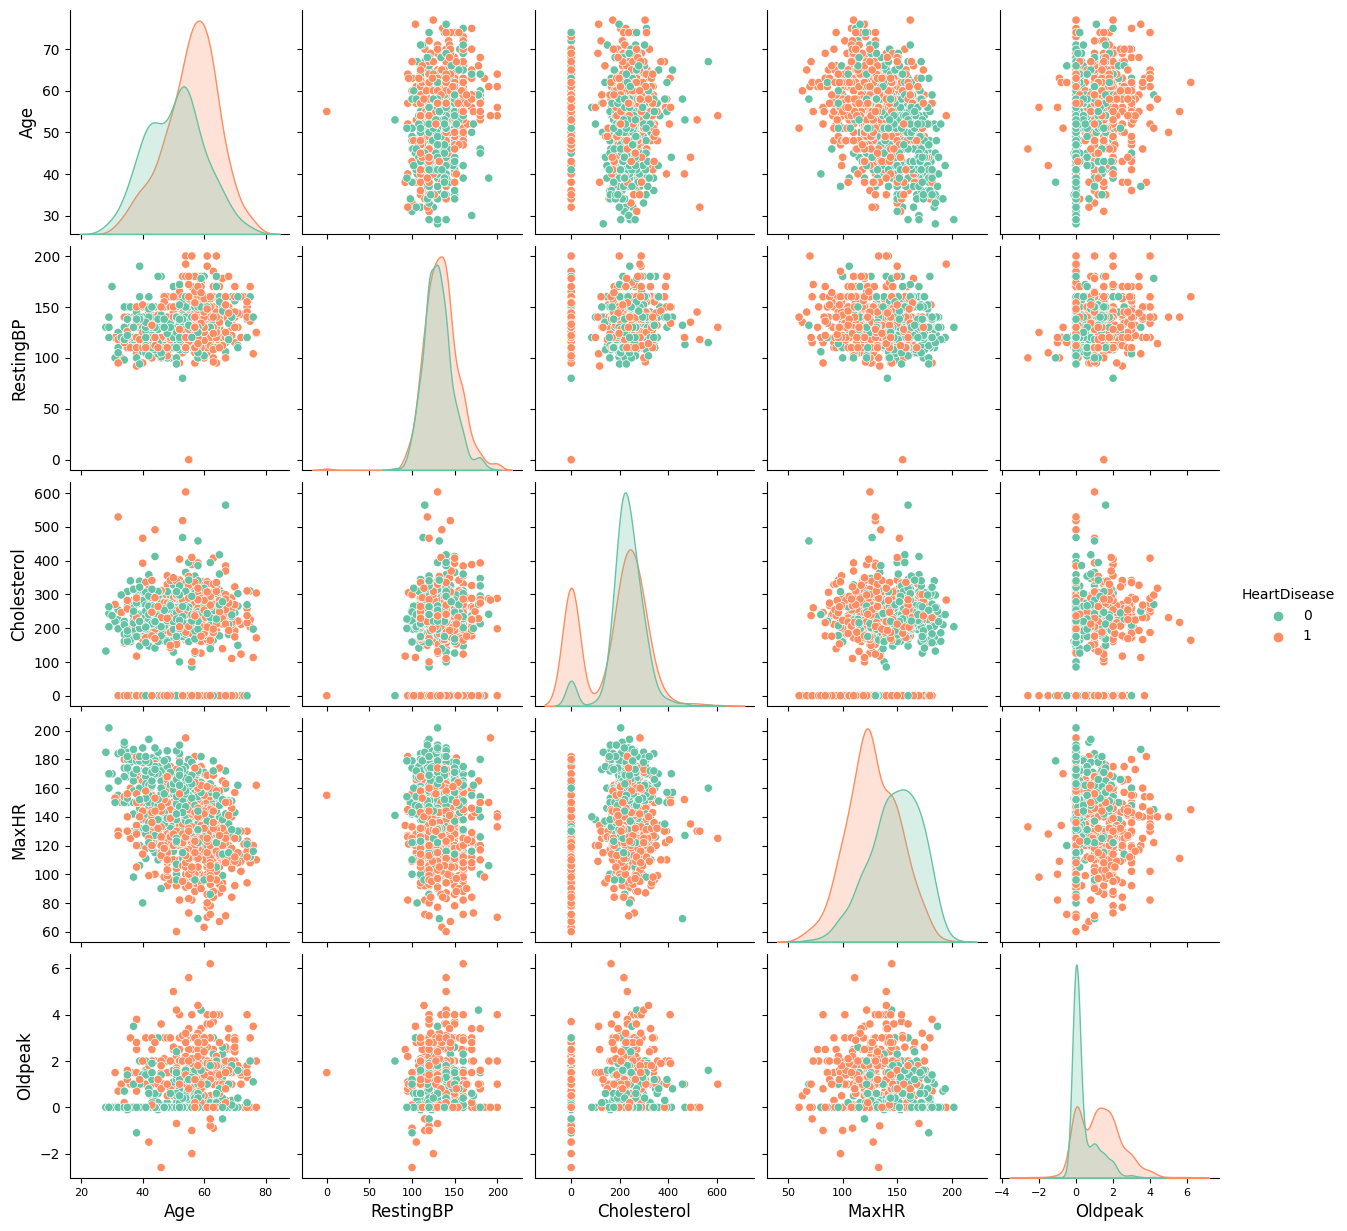

In [147]:
# Visualize the whole dataset de los valores de las variables multiples: Age, RestingBP, Cholesterol, MaxHR
data_multiple = data[['Age', 'RestingBP', 'Cholesterol', "MaxHR", "Oldpeak","HeartDisease"]].copy()
g = sns.pairplot(data_multiple, hue='HeartDisease', palette="Set2", diag_kind="kde", height=2.5)
plt.show()

In [57]:
columns = list(data.columns)
columns

['Age',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease',
 'Sex_F',
 'Sex_M',
 'ExerciseAngina_N',
 'ExerciseAngina_Y']

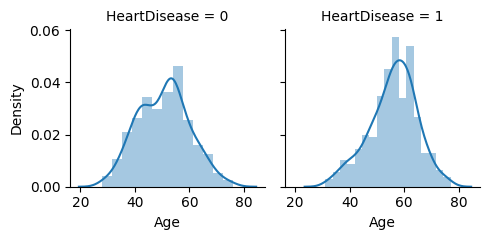

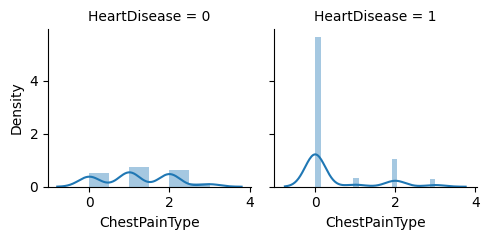

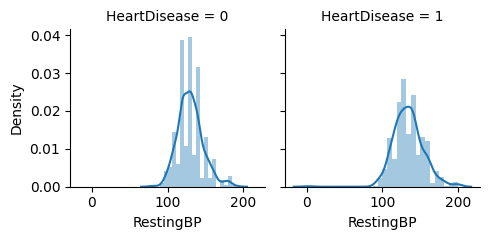

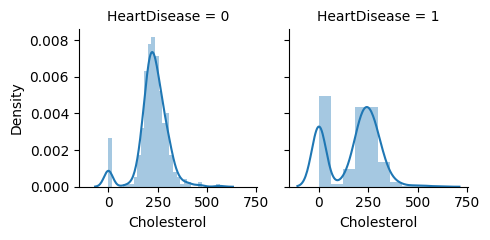

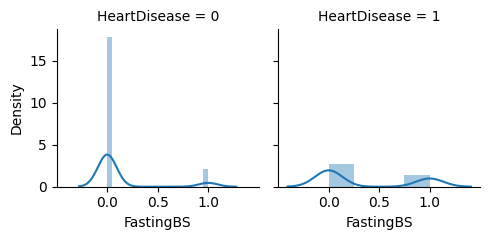

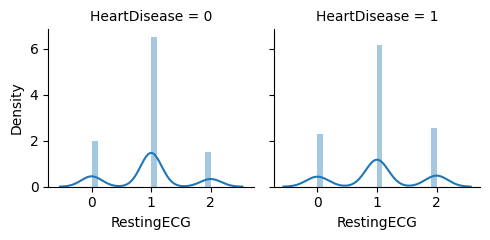

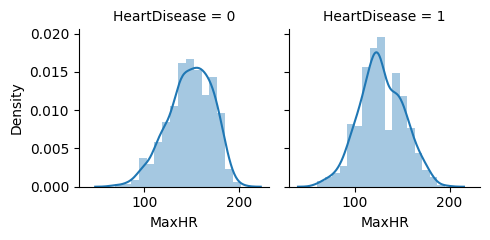

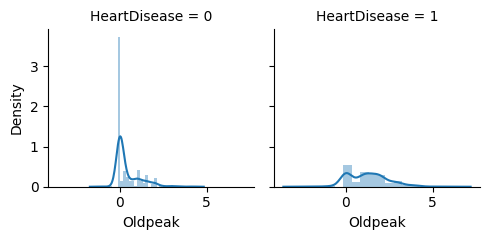

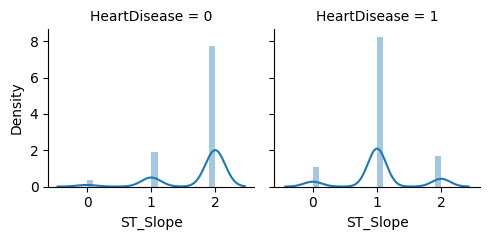

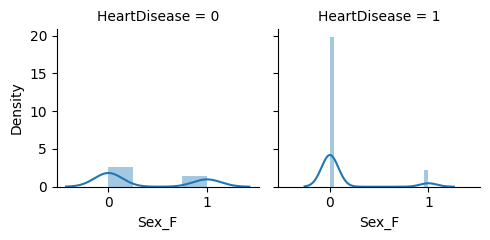

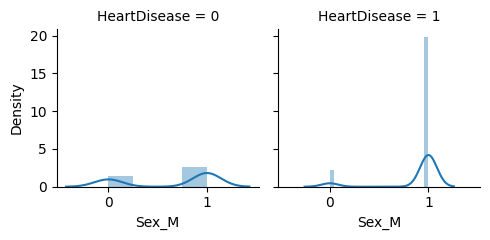

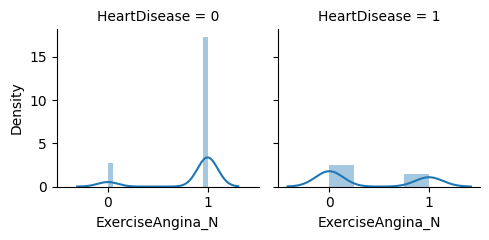

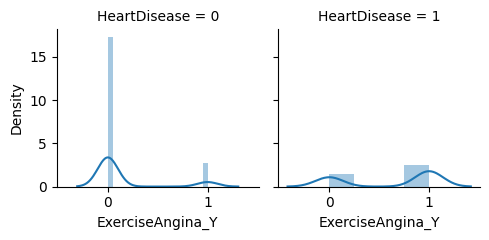

In [58]:
for columna in columns:
    if columna != "HeartDisease":
        plot = sns.FacetGrid(data, col="HeartDisease", palette="Set2", height=2.5) 
        plot.map(sns.distplot, columna)
        plt.show()

In [357]:
# Dejamos las columnas finales para el modelo

In [358]:
data_T=data.copy()
data_T

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40              1        140          289          0           1    172   
1     49              2        160          180          0           1    156   
2     37              1        130          283          0           2     98   
3     48              0        138          214          0           1    108   
4     54              2        150          195          0           1    122   
..   ...            ...        ...          ...        ...         ...    ...   
913   45              3        110          264          0           1    132   
914   68              0        144          193          1           1    141   
915   57              0        130          131          0           1    115   
916   57              1        130          236          0           0    174   
917   38              2        138          175          0           1    173   

     Oldpeak  ST_Slope  HeartDisease  Sex_F  Sex_M  ExerciseAngina_N  \
0        0.0         2             0      0      1                 1   
1        1.0         1             1      1      0                 1   
2        0.0         2             0      0      1                 1   
3        1.5         1             1      1      0                 0   
4        0.0         2             0      0      1                 1   
..       ...       ...           ...    ...    ...               ...   
913      1.2         1             1      0      1                 1   
914      3.4         1             1      0      1                 1   
915      1.2         1             1      0      1                 0   
916      0.0         1             1      1      0                 1   
917      0.0         2             0      0      1                 1   

     ExerciseAngina_Y  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
..                ...  
913                 0  
914                 0  
915                 1  
916                 0  
917                 0  

[918 rows x 14 columns]

In [359]:
data_T.drop(columns=["Sex_F"], inplace=True, axis=1)
data_T.drop(columns=["ExerciseAngina_N"],inplace=True, axis=1)

In [360]:
data_T

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40              1        140          289          0           1    172   
1     49              2        160          180          0           1    156   
2     37              1        130          283          0           2     98   
3     48              0        138          214          0           1    108   
4     54              2        150          195          0           1    122   
..   ...            ...        ...          ...        ...         ...    ...   
913   45              3        110          264          0           1    132   
914   68              0        144          193          1           1    141   
915   57              0        130          131          0           1    115   
916   57              1        130          236          0           0    174   
917   38              2        138          175          0           1    173   

     Oldpeak  ST_Slope  HeartDisease  Sex_M  ExerciseAngina_Y  
0        0.0         2             0      1                 0  
1        1.0         1             1      0                 0  
2        0.0         2             0      1                 0  
3        1.5         1             1      0                 1  
4        0.0         2             0      1                 0  
..       ...       ...           ...    ...               ...  
913      1.2         1             1      1                 0  
914      3.4         1             1      1                 0  
915      1.2         1             1      1                 1  
916      0.0         1             1      0                 0  
917      0.0         2             0      1                 0  

[918 rows x 12 columns]

In [361]:
# Rellenamos los datos que consideramos vacios

In [362]:
df1=pd.DataFrame()
df1=data[(data.Cholesterol!=0)]

df1=df1.groupby(by=[df1.Sex_M, df1.Age, df1.ST_Slope, df1.HeartDisease],as_index=False).Cholesterol.value_counts()
df1

Sex_M  Age  ST_Slope  HeartDisease  Cholesterol  count
0        0   30         2             0          237      1
1        0   31         2             0          219      1
2        0   32         2             0          198      1
3        0   33         1             1          246      1
4        0   34         2             0          161      1
..     ...  ...       ...           ...          ...    ...
726      1   75         1             1          203      1
727      1   75         1             1          225      1
728      1   76         0             1          113      1
729      1   77         2             1          171      1
730      1   77         2             1          304      1

[731 rows x 6 columns]

In [363]:
def media_colesterol(df, d_HeartDisease,d_ST_Slope, d_Age, d_Sex):
    condiciones = (df.HeartDisease == d_HeartDisease) & (df.ST_Slope == d_ST_Slope) & (df.Age//10 == d_Age//10) & (df.Sex_M == d_Sex)
    media=df.loc[condiciones].Cholesterol.mean()
    if pd.isna(media):
        if d_Sex == 0:
            condiciones = (df.HeartDisease == d_HeartDisease) & (df.ST_Slope == d_ST_Slope) & (df.Age//10 == d_Age//10) & (df.Sex_M == 1)
            media=df.loc[condiciones].Cholesterol.mean()                
        else:   
            condiciones = (df.HeartDisease == d_HeartDisease) & (df.ST_Slope == d_ST_Slope) & (df.Age//10 == d_Age//10) & (df.Sex_M == 0)
            media=df.loc[condiciones].Cholesterol.mean()        
    if pd.isna(media):
        condiciones = (df.HeartDisease == d_HeartDisease) & (df.Age//10 == d_Age//10) & (df.Sex_M == d_Sex)
        media=df.loc[condiciones].Cholesterol.mean()

    return media

In [364]:
for i in range(len(data_T)):
    if data_T["Cholesterol"].values[i]==0:
        media = media_colesterol(df1, data_T["HeartDisease"].values[i], data_T["ST_Slope"].values[i], data_T["Age"].values[i], data_T["Sex_M"].values[i])        
        if pd.isna(media):
            media = media_colesterol(df1, data_T["HeartDisease"].values[i], data_T["Age"].values[i], data_T["Sex_M"].values[i])                    
        data_T["Cholesterol"].values[i] = int(round(media))


In [365]:
data_T[data_T.Cholesterol==0].count()

Age                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
Oldpeak             0
ST_Slope            0
HeartDisease        0
Sex_M               0
ExerciseAngina_Y    0
dtype: int64

In [366]:
df1=pd.DataFrame()
df1=data[(data.RestingBP!=0)]

df1=df1.groupby(by=[df1.Age, df1.Cholesterol, df1.Sex_M, df1.ExerciseAngina_Y, df1.HeartDisease],as_index=False).RestingBP.value_counts()
df1

Age  Cholesterol  Sex_M  ExerciseAngina_Y  HeartDisease  RestingBP  count
0     28          132      1                 0             0        130      1
1     29          204      1                 0             0        130      1
2     29          243      1                 0             0        120      1
3     29          263      1                 0             0        140      1
4     30          237      0                 0             0        170      1
..   ...          ...    ...               ...           ...        ...    ...
900   75          310      1                 1             0        160      1
901   76          113      1                 0             1        104      1
902   76          197      0                 0             0        140      1
903   77          171      1                 1             1        124      1
904   77          304      1                 1             1        125      1

[905 rows x 7 columns]

In [367]:
data_T[(data_T.RestingBP==0)]

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
449   55              2          0          250          0           1    155   

     Oldpeak  ST_Slope  HeartDisease  Sex_M  ExerciseAngina_Y  
449      1.5         1             1      1                 0

In [368]:
def media_RestingBP(df, d_Age, d_Cholesterol ,d_HeartDisease, d_Sex, d_ExerciseAngina_Y):
    condiciones = (df.Age//10 == d_Age//10) & (df.Cholesterol//10 == d_Cholesterol//10) & (df.HeartDisease == d_HeartDisease) & (df.Sex_M == d_Sex)  & (df.ExerciseAngina_Y == d_ExerciseAngina_Y)
    media=df.loc[condiciones].RestingBP.mean()   
    if pd.isna(media):
        condiciones = (df.HeartDisease == d_HeartDisease) & (df.Age//10 == d_Age//10) & (df.Sex_M == d_Sex)
        media=df.loc[condiciones].Cholesterol.mean()
    return media

In [369]:
for i in range(len(data_T)):
    if data_T["RestingBP"].values[i]==0:
        media = media_RestingBP(df1, data_T.Age.values[i], data_T.Cholesterol.values[i], data_T.HeartDisease.values[i], data_T.Sex_M.values[i], data_T.ExerciseAngina_Y.values[i]) 
        data_T["RestingBP"].values[i] = media

In [370]:
data_T[(data_T.RestingBP==0)]

Empty DataFrame
Columns: [Age, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, Oldpeak, ST_Slope, HeartDisease, Sex_M, ExerciseAngina_Y]
Index: []

In [371]:
#Comparamos si han cambiado significativamente los valores de las medias

In [372]:
data.describe()

Age  ChestPainType   RestingBP  Cholesterol   FastingBS  \
count  918.000000     918.000000  918.000000   918.000000  918.000000   
mean    53.510893       0.781046  132.396514   198.799564    0.233115   
std      9.432617       0.956519   18.514154   109.384145    0.423046   
min     28.000000       0.000000    0.000000     0.000000    0.000000   
25%     47.000000       0.000000  120.000000   173.250000    0.000000   
50%     54.000000       0.000000  130.000000   223.000000    0.000000   
75%     60.000000       2.000000  140.000000   267.000000    0.000000   
max     77.000000       3.000000  200.000000   603.000000    1.000000   

       RestingECG       MaxHR     Oldpeak    ST_Slope  HeartDisease  \
count  918.000000  918.000000  918.000000  918.000000    918.000000   
mean     0.989107  136.809368    0.887364    1.361656      0.553377   
std      0.631671   25.460334    1.066570    0.607056      0.497414   
min      0.000000   60.000000   -2.600000    0.000000      0.000000   
25%      1.000000  120.000000    0.000000    1.000000      0.000000   
50%      1.000000  138.000000    0.600000    1.000000      1.000000   
75%      1.000000  156.000000    1.500000    2.000000      1.000000   
max      2.000000  202.000000    6.200000    2.000000      1.000000   

            Sex_F       Sex_M  ExerciseAngina_N  ExerciseAngina_Y  
count  918.000000  918.000000        918.000000        918.000000  
mean     0.210240    0.789760          0.595861          0.404139  
std      0.407701    0.407701          0.490992          0.490992  
min      0.000000    0.000000          0.000000          0.000000  
25%      0.000000    1.000000          0.000000          0.000000  
50%      0.000000    1.000000          1.000000          0.000000  
75%      0.000000    1.000000          1.000000          1.000000  
max      1.000000    1.000000          1.000000          1.000000

In [373]:
data_T.describe()

Age  ChestPainType   RestingBP  Cholesterol   FastingBS  \
count  918.000000     918.000000  918.000000   918.000000  918.000000   
mean    53.510893       0.781046  132.582789   245.197168    0.233115   
std      9.432617       0.956519   18.034657    53.718290    0.423046   
min     28.000000       0.000000   80.000000    85.000000    0.000000   
25%     47.000000       0.000000  120.000000   214.000000    0.000000   
50%     54.000000       0.000000  130.000000   245.000000    0.000000   
75%     60.000000       2.000000  140.000000   269.000000    0.000000   
max     77.000000       3.000000  200.000000   603.000000    1.000000   

       RestingECG       MaxHR     Oldpeak    ST_Slope  HeartDisease  \
count  918.000000  918.000000  918.000000  918.000000    918.000000   
mean     0.989107  136.809368    0.887364    1.361656      0.553377   
std      0.631671   25.460334    1.066570    0.607056      0.497414   
min      0.000000   60.000000   -2.600000    0.000000      0.000000   
25%      1.000000  120.000000    0.000000    1.000000      0.000000   
50%      1.000000  138.000000    0.600000    1.000000      1.000000   
75%      1.000000  156.000000    1.500000    2.000000      1.000000   
max      2.000000  202.000000    6.200000    2.000000      1.000000   

            Sex_M  ExerciseAngina_Y  
count  918.000000        918.000000  
mean     0.789760          0.404139  
std      0.407701          0.490992  
min      0.000000          0.000000  
25%      1.000000          0.000000  
50%      1.000000          0.000000  
75%      1.000000          1.000000  
max      1.000000          1.000000

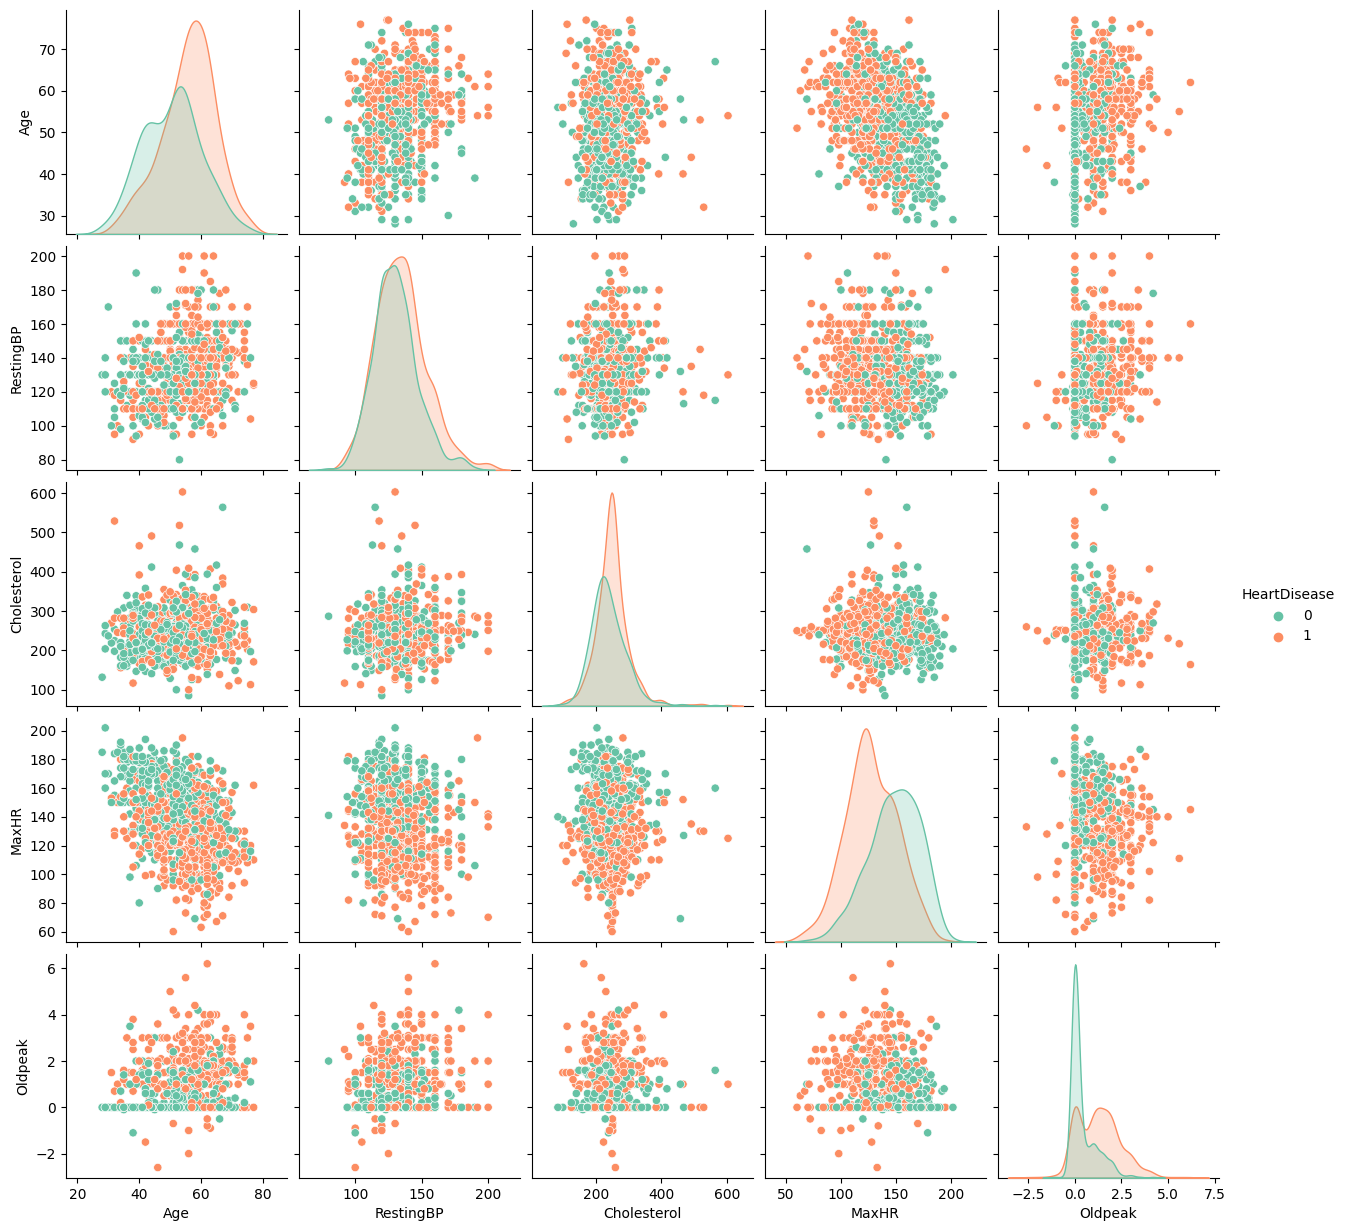

In [283]:
# Visualize the whole dataset de los valores de las variables multiples: Age, RestingBP, Cholesterol, MaxHR
data_multiple = data_T[['Age', 'RestingBP', 'Cholesterol', "MaxHR", "Oldpeak","HeartDisease"]].copy()
g = sns.pairplot(data_multiple, hue='HeartDisease', palette="Set2", diag_kind="kde", height=2.5)
plt.show()

# COMPROBAMOS LOS MODELOS CON PYCARET DATA SET = df

In [411]:
from pycaret.classification import *
lista_modelos=[]
for i in range(0,10,1):
    clf = setup(data=df, target="HeartDisease")
    compare_models()
    lista_modelos.append(clf)

In [412]:
for i in range(0,10,1):
    print(lista_modelos[i][9][1])

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.8660  0.9133  0.8914  0.8693   
rf               Random Forest Classifier    0.8598  0.9256  0.8971  0.8546   
ada                  Ada Boost Classifier    0.8566  0.8997  0.8714  0.8672   
gbc          Gradient Boosting Classifier    0.8566  0.9186  0.8829  0.8597   
nb                            Naive Bayes    0.8552  0.9191  0.8857  0.8574   
lda          Linear Discriminant Analysis    0.8520  0.9195  0.8829  0.8537   
lr                    Logistic Regression    0.8505  0.9219  0.8857  0.8501   
et                 Extra Trees Classifier    0.8504  0.9128  0.8829  0.8514   
ridge                    Ridge Classifier    0.8489  0.0000  0.8829  0.8491   
dt               Decision Tree Classifier    0.7881  0.7844  0.8257  0.7944   
knn                K Neighbors Classifier    0.7151  0.7521  0.7286  0.7446   
qda       Quadratic Discriminant Analysis    0.6979 

# COMPROBAMOS LOS MODELOS CON PYCARET DATA SET = data_T

In [201]:
from pycaret.classification import *
lista_modelos=[]
for i in range(0,5,1):
    clf = setup(data=data_T, target="HeartDisease")
    compare_models()
    lista_modelos_data_T.append(clf)

In [236]:
for i in range(0,5,1):
    print(lista_modelos_data_T[i][21])

[<pandas.io.formats.style.Styler object at 0x00000142FB5442B0>,                                     Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.8753  0.9190  0.9086  0.8758   
rf               Random Forest Classifier    0.8707  0.9297  0.9113  0.8678   
et                 Extra Trees Classifier    0.8707  0.9269  0.9087  0.8693   
gbc          Gradient Boosting Classifier    0.8675  0.9271  0.9085  0.8650   
ada                  Ada Boost Classifier    0.8474  0.9042  0.8561  0.8743   
qda       Quadratic Discriminant Analysis    0.8472  0.9106  0.8864  0.8512   
lr                    Logistic Regression    0.8427  0.9082  0.8700  0.8552   
ridge                    Ridge Classifier    0.8411  0.0000  0.8589  0.8611   
lda          Linear Discriminant Analysis    0.8411  0.9078  0.8589  0.8611   
nb                            Naive Bayes    0.8380  0.9079  0.8534  0.8605   
dt               Decision Tree Classifier    0.7912  0.7893  0.8035

In [391]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
def precision(tipo, y_test, y_pred):
    
    # Calculo de precisión del modelo
    from sklearn.metrics import precision_score
    precision = precision_score(y_test, y_pred, average='macro')
    print("MODELO: ",tipo)
    print("Precisión del modelo: ",precision)

    from sklearn.metrics import accuracy_score
    exactitud = accuracy_score(y_test, y_pred)
    print("Exactitud del modelo: ",exactitud)

    # Calcular la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad = recall_score(y_test, y_pred, average='macro')
    print("Sensibilidad del modelo: ",sensibilidad)

    #Calculo el puntaje F1 del modelo
    from sklearn.metrics import f1_score
    puntajef1 = f1_score(y_test, y_pred, average='macro')
    print("Puntaje F1 del modelo; ", puntajef1)
    
    puntaje_total = (precision+exactitud+sensibilidad+puntajef1)/4
    print("Puntaje Meedia del modelo; ", puntaje_total)
    print("\n \n")
    return

In [396]:
# Optamos por los de clasificación
X=data_T.drop(columns=["HeartDisease"], axis=1)
y=data_T.HeartDisease

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22)

In [412]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf_ET = ExtraTreesClassifier()
clf_ET.fit(X_train, y_train)
y_pred = clf_ET.predict(X_test)
acc_ET = accuracy_score(y_test, y_pred)

precision("ExtraTreesClassifier", y_test, y_pred)

MODELO:  ExtraTreesClassifier
Precisión del modelo:  0.9045144045144045
Exactitud del modelo:  0.905940594059406
Sensibilidad del modelo:  0.9053571428571429
Puntaje F1 del modelo;  0.9049129152937097
Puntaje Meedia del modelo;  0.9051812641811657

 



In [399]:
# Probamos el mismo modelos pero con los DATOS SIN CAMBIOS DE COLESTEROL
X2=data.drop(columns=["HeartDisease"], axis=1)
y2=data.HeartDisease
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.22)

# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)
acc_ET2 = accuracy_score(y_test2, y_pred2)

precision("ExtraTreesClassifier_DATA", y_test2, y_pred2)

MODELO:  ExtraTreesClassifier_DATA
Precisión del modelo:  0.8901363271852446
Exactitud del modelo:  0.8910891089108911
Sensibilidad del modelo:  0.8879585326953747
Puntaje F1 del modelo;  0.8889555222388805
Puntaje Meedia del modelo;  0.8895348727575978

 



In [403]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)

precision("RandomForestClassifier", y_test, y_pred)

MODELO:  RandomForestClassifier
Precisión del modelo:  0.8897817460317461
Exactitud del modelo:  0.8910891089108911
Sensibilidad del modelo:  0.8897817460317461
Puntaje F1 del modelo;  0.8897817460317461
Puntaje Meedia del modelo;  0.8901085867515324

 



In [405]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_NB = accuracy_score(y_test, y_pred)

precision("GaussianNB", y_test, y_pred)

MODELO:  GaussianNB
Precisión del modelo:  0.8806862745098039
Exactitud del modelo:  0.8811881188118812
Sensibilidad del modelo:  0.885218253968254
Puntaje F1 del modelo;  0.8807673389080177
Puntaje Meedia del modelo;  0.8819649965494892

 



In [406]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_GradientBC = accuracy_score(y_test, y_pred)

precision("GradientBoostingClassifier", y_test, y_pred)

MODELO:  GradientBoostingClassifier
Precisión del modelo:  0.8804824561403508
Exactitud del modelo:  0.8811881188118812
Sensibilidad del modelo:  0.8786706349206349
Puntaje F1 del modelo;  0.879486924530178
Puntaje Meedia del modelo;  0.8799570336007612

 



In [408]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_LG = accuracy_score(y_test, y_pred)

precision("LogisticRegression", y_test, y_pred)

MODELO:  LogisticRegression
Precisión del modelo:  0.8746686303387334
Exactitud del modelo:  0.8762376237623762
Sensibilidad del modelo:  0.8785714285714286
Puntaje F1 del modelo;  0.8755513935779591
Puntaje Meedia del modelo;  0.8762572690626242

 



In [407]:
#RidgeClassifier

from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(class_weight=None)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_RidgeClassifier = accuracy_score(y_test, y_pred)
precision("RidgeClassifier", y_test, y_pred)

MODELO:  RidgeClassifier
Precisión del modelo:  0.8699960753532182
Exactitud del modelo:  0.8712871287128713
Sensibilidad del modelo:  0.8741071428571429
Puntaje F1 del modelo;  0.870665878644602
Puntaje Meedia del modelo;  0.8715140563919586

 



In [404]:
# LightGBM - Light Gradient Boosting Machine
from lightgbm import LGBMClassifier
clf = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_LightGBM = accuracy_score(y_test, y_pred)
precision("LightGBM - Light Gradient Boosting Machine", y_test, y_pred)

MODELO:  LightGBM - Light Gradient Boosting Machine
Precisión del modelo:  0.8603468899521531
Exactitud del modelo:  0.8613861386138614
Sensibilidad del modelo:  0.8586309523809523
Puntaje F1 del modelo;  0.8594014119518745
Puntaje Meedia del modelo;  0.8599413482247102

 



In [409]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred)

precision("DecisionTreeClassifier", y_test, y_pred)

MODELO:  DecisionTreeClassifier
Precisión del modelo:  0.7895256916996047
Exactitud del modelo:  0.7920792079207921
Sensibilidad del modelo:  0.7906746031746033
Puntaje F1 del modelo;  0.7900207900207901
Puntaje Meedia del modelo;  0.7905750732039476

 



In [410]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_KN = accuracy_score(y_test, y_pred)

precision("KNeighborsClassifier", y_test, y_pred)

MODELO:  KNeighborsClassifier
Precisión del modelo:  0.6897233201581028
Exactitud del modelo:  0.693069306930693
Sensibilidad del modelo:  0.6904761904761905
Puntaje F1 del modelo;  0.6900306900306901
Puntaje Meedia del modelo;  0.690824876898919

 



In [411]:
#Support Vector Machine - SVC
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_SVC = accuracy_score(y_test, y_pred)

precision("SVC", y_test, y_pred)

MODELO:  SVC
Precisión del modelo:  0.6792682926829268
Exactitud del modelo:  0.6831683168316832
Sensibilidad del modelo:  0.675
Puntaje F1 del modelo;  0.6760224538893344
Puntaje Meedia del modelo;  0.678364765850986

 



In [413]:
# Salvamos el modelo
import pickle
# create an iterator object with write permission - model.pkl
with open('model_ET_pkl', 'wb') as files:
    pickle.dump(clf_ET, files)

In [ ]:
# Para leer el modelo

# with open('model_ET_pkl' , 'rb') as f:
#    clf_ET = pickle.load(f)